In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [349]:
# Estilo - seaborn

sns.set_style("whitegrid", {'xtick.bottom': True, 'ytick.left': True, 
                            'font.family': ['Liberation Sans'], 'axes.edgecolor': '0.7',
                            'grid.color': '.8'})
sns.set_context('paper')
sns.set_palette('deep')

c = sns.color_palette()

#sns.palplot(c)

def ticks_font(size = 11):
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)

def label_size(ax, size = 13):
    ax.xaxis.label.set_size(size)
    ax.yaxis.label.set_size(size)
    
def legend_format(ax, size = 11):
    ax.legend(fontsize = size, frameon = True, markerscale = 1)

def grid(ax):
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

In [295]:
df_main5 = pd.read_csv('k_3/networks/results/data_100_5.csv', index_col = 0)
df_main5["HBA/OP"] = round(df_main5.HBA/df_main5.OP,3)
df_main5["MBA/OP"] = round(df_main5.MBA/df_main5.OP,3)
df_main5["CI/OP"] = round(df_main5.CI/df_main5.OP,3)

In [130]:
df_main120 = pd.read_csv('k_3/networks/results/data_120_6.csv', index_col = 0)
df_main080 = pd.read_csv('k_3/networks/results/data_080_4.csv', index_col = 0)


In [188]:
df_main4 = pd.read_csv('k_4/results/data_100_5.csv', index_col = 0)
df_main6 = pd.read_csv('k_6/results/data_100_5.csv', index_col = 0)


# Fit duas retas

Valores criticos: 

k3 = 0.73 (i = 65) - r1 = 0.92, r2 = 0.77

k4 = 0.79 (i = 30) - r1 = 0.92, r2 = 0.65

k6 = 0.81 (i = 42) - r1 = 0.94, r2 = 0.72

In [84]:
# retorna ponto de cruzamento entre retas no intervalo quebrado em div
def ponto_critico(df, x, y, div, inv = False):
    
    # limites no x das retas 1 e 2
    x1 = df[x].iloc[div:]
    x2 = df[x].iloc[:div]
    
    # medida para fazer fit
    if inv:
        y1 = 1/df[y].iloc[div:]
        y2 = 1/df[y].iloc[:div]
    else:  
        y1 = df[y].iloc[div:]
        y2 = df[y].iloc[:div]

    # resultado regressão linear
    # retorna ["slope", "intercept", "r_value", "p_value", "std_err"]
    r1 = linregress(x1,y1)
    r2 = linregress(x2,y2)

    cross = (r2[1] - r1[1])/(r1[0] - r2[0])
    #print(df['Q'].iloc[div], r1[0] * round(cross,3) + r1[1])
    
    return round(cross,3), r1, r2

In [15]:
# retorna lista/
def reta_intercept(x, reg):
    # reg -> pandas dataframe
    func1 = reg['slope'] *x + reg['intercept']
    
    return func1

In [328]:
outliers = ['mu01/net11', 'mu01/net05', 'mu01/net13']

df_main5 = df_main5.drop(outliers)

In [387]:
regressao_1 = pd.DataFrame({}, columns=["slope", "intercept", "r_value", "p_value", "std_err"])
regressao_2 = pd.DataFrame({}, columns=["slope", "intercept", "r_value", "p_value", "std_err"])  

q_criticos = []

df = df_main5

# realizar as duas regressoes para diferentes separaçoes de Qs

for i in range(1,len(df)):
    
    res = ponto_critico(df, 'Q', 'OP', i, inv = True)
    q_criticos.append(res[0])
    
    regressao_1.loc[len(regressao_1), :] = list(res[1])
    regressao_2.loc[len(regressao_2), :] = list(res[2])

regressao_1["r_square"] = regressao_1["r_value"]**2
regressao_2["r_square"] = regressao_2["r_value"]**2

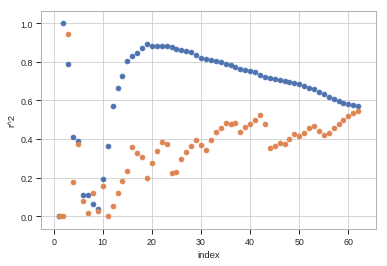

In [373]:
# detectar ponto de inflexao

plt.xlabel('index')
plt.ylabel('r^2')

y1 = list(regressao_1['r_square'])
y1.reverse()

plt.scatter(range(1,len(df)), y1)
plt.scatter(range(1,len(df)), regressao_2['r_square'])

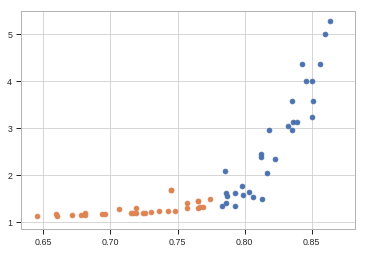

In [383]:
xdiv = 30

plt.scatter(df['Q'][xdiv:], 1/df['OP'][xdiv:])
plt.scatter(df['Q'][:xdiv], 1/df['OP'][:xdiv])

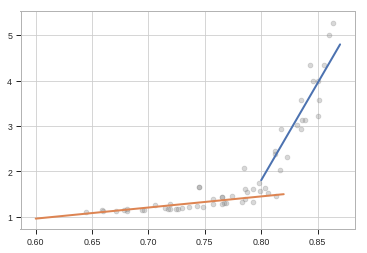

In [384]:
xdiv = 30

x1 = np.linspace(0.8, 0.87, 20)
x2 = np.linspace(0.6, 0.82, 20)

plt.plot(x1, reta_intercept(x1, regressao_1.iloc[xdiv]), lw=2)
plt.plot(x2, reta_intercept(x2, regressao_2.iloc[xdiv]), lw=2)
plt.scatter(df['Q'], 1/df['OP'], alpha=0.3, color='grey')

In [385]:
ponto_critico(df, 'Q', 'OP', 30, inv = True)

(0.791,
 LinregressResult(slope=42.19296071451523, intercept=-31.92964417202143, rvalue=0.92623970824657, pvalue=2.192071417678921e-13, stderr=3.2449205569835),
 LinregressResult(slope=2.556057458529863, intercept=-0.5822185172104717, rvalue=0.6588822673883277, pvalue=7.524827072813393e-05, stderr=0.5514977026533273))

In [345]:
reta_intercept(0.727, regressao_2.iloc[xdiv])

1.5074812109504252

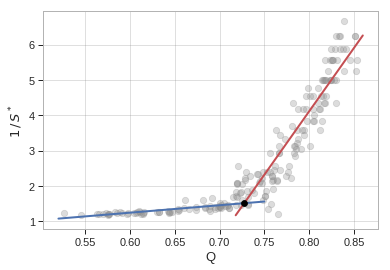

In [394]:
# plot duas retas

fig, ax = plt.subplots()

ax.set_xlabel("Q")
ax.set_ylabel(r"$1\,/\, S^*$")

#ax.scatter(0.724,1.46, c="black", s=35,zorder=10)
ax.scatter(0.727,1.51, c="black", s=35,zorder=10)
ax.scatter(df["Q"], 1/df["OP"], alpha = 0.3, s=40, color = c[-3])

#ax.plot(x1,reta1, lw=2)
#ax.plot(x2,reta2,c=c[3], lw=2)

#set_other_plot_default_stuff(ax)

xdiv = 65

x1 = np.linspace(0.718, 0.86, 20)
x2 = np.linspace(0.52, 0.75, 20)

ax.plot(x1, reta_intercept(x1, regressao_1.iloc[xdiv]), lw=2,c=c[3])
ax.plot(x2, reta_intercept(x2, regressao_2.iloc[xdiv]), lw=2)

ticks_font()
label_size(ax)
grid(ax)

#ax.get_legend().remove()

#fig.savefig('figs_artigo/overleaf/ratio_AV_OP.png',dpi=300, bbox_inches='tight')

## Tentativa de classificação

In [167]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from matplotlib import cm
from sklearn.linear_model import LogisticRegression

In [132]:
df['1/op'] = 1/df['OP']

In [174]:
x_y = np.array(df[['Q','AV/OP']])

In [175]:
#classif = KMeans(n_clusters=2, init=np.array([[0.5,1],[0.8,4]]))
classif = SpectralClustering(n_clusters=2).fit_predict(x_y)

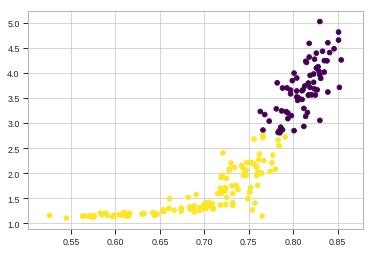

In [177]:
plt.scatter(x_y[:,0], x_y[:,1], c=classif, cmap='viridis')